In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import os
import random


from empirical_data import *
from optimized_random_response import *
from randomized_response import *
from repetitive_optimizer import *
from synthetic_dataset import *
from exponential_mechanism import *
from simpleinfotheory import *
from normalize_error_matrix import *
from alphabet import *
import matplotlib as mpl
import matplotlib.lines as mlines

mpl.rcParams.update({'font.size': 12})

In [2]:
def mutual_info_pair(a, b):
    return mutualinformationempirical(xn=a, yn=b)[0]

In [3]:
# I(A;A',B') = I(A;A') + I(A;B'|A')

def conditional_mutual_info(a, b, c):
    return conditionalmutualinformationempirical(a, b, c)

def total_info_leakage(A, A_prime, B_prime):
    return mutual_info_pair(A, A_prime) + conditional_mutual_info(A, B_prime, A_prime)

In [4]:
def mutual_information(a, b):
    processed_a = []
    # print(a)
    # print(b)
    for i in a:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_a.append(np.array(actual))
    processed_a = np.array(processed_a)
    processed_b = []
    
    for i in b:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_b.append(np.array(actual))
    processed_b = np.array(processed_b)

    mi = []
    # print("processed_a", processed_a)
    # print("processed_b", processed_b)
    # for i in range(np.shape(processed_b)[1]):
    #     mi.append(mutual_info_pair(processed_a[:,i], processed_b[:,i]))
    # mi.append(mutual_info_pair(processed_a[:,0], processed_a[:,1]))
    # mi.append(mutual_info_pair(processed_b[:,1], processed_b[:,0]))
    # mi.append(mutual_info_pair(processed_a[:,0], processed_b[:,0]))
    # mi.append(mutual_info_pair(processed_a[:,1], processed_b[:,1]))
    mi.append(total_info_leakage(processed_a[:,0], processed_b[:,0], processed_b[:,1]))
    mi.append(total_info_leakage(processed_a[:,1], processed_b[:,1], processed_b[:,0]))
    # mi.append(total_info_leakage(processed_a[:,0], processed_b[:,1], processed_b[:,0]))
    return mi
    

{'1': 2, '0': 1} [0.3, 0.01, 0.01, 0.01, 0.3, 0.01, 0.01, 0.01, 0.34]
0.0
l2_error  1.3114916050401226
0.16
l2_error  1.3171893740521783
0.32
l2_error  1.3356522269373834
0.48
l2_error  1.3646304657838488
0.64
l2_error  1.4069031238303724
0.8
l2_error  1.4630330239155214
0.96
l2_error  1.5305622574498612
1.12
l2_error  1.6083215218355913
1.28
l2_error  1.691722624726405
1.44
l2_error  1.777504791328394
1.6
l2_error  1.863477707133194
1.76
l2_error  1.9548365154325091
1.92
l2_error  2.049124433449614
2.08
l2_error  2.1446173831475526
2.24
l2_error  2.236042936175058
2.4
l2_error  2.3287292986668615
2.56
l2_error  2.4145828724692473
2.72
l2_error  2.4033996266561344
2.88
l2_error  2.4824603036441273
3.04
l2_error  2.510059148727446
3.2
l2_error  2.577180830140511
3.36
l2_error  2.612166113450849
3.52
l2_error  2.5164728287644396
3.68
l2_error  2.3209686295032825
3.84


/Users/sandarujayawardana/Documents/Python_code/.venv/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


l2_error  2.096214342656928
4.0
l2_error  2.1695576974109763
4.16
l2_error  2.157380920527705
4.32
l2_error  2.0755049747840166
4.48
l2_error  2.142460953278472
4.64
l2_error  1.9965746198601673
4.8
l2_error  1.9158400223106467
4.96
l2_error  2.1591702721804817
5.12
l2_error  1.6574502690049617
5.28
l2_error  1.3708097972311548
5.44
l2_error  1.500036412086943
5.6000000000000005
l2_error  1.4885977959871048
5.76
l2_error  0.5132913011840401
5.92
l2_error  0.5760959719952303
6.08
l2_error  0.753568416580799
6.24
l2_error  0.7749340398964673
{'1': 1, '0': 1} [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]
0.0
l2_error  0.03362519850957168
0.16
l2_error  0.07201640142549832
0.32
l2_error  0.13496928310443307
0.48
l2_error  0.20374292092721627
0.64
l2_error  0.2762719982419832
0.8
l2_error  0.35069939178323417
0.96
l2_error  0.4290058621505714
1.12
l2_error  0.5100077332499253
1.28
l2_error  0.5940436028056214
1.44
l2_error  0.680575961

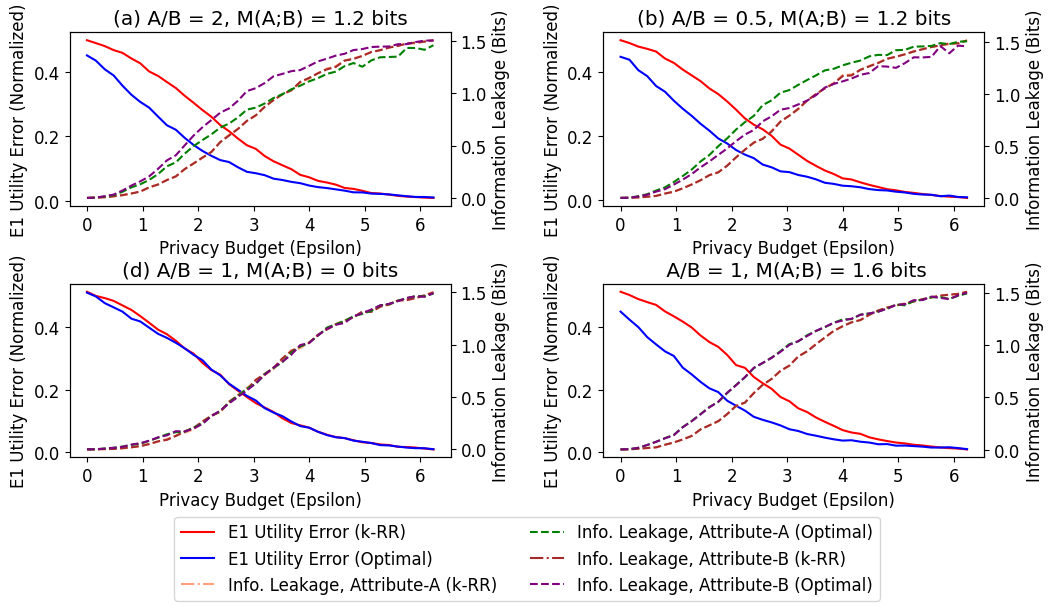

In [5]:
NUM_ATTRIBUTES = 2
NUM_STATES = [3, 3]
DATASET_SIZE = 10000
EPS_ARRAY = np.arange(40)*0.16
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
plt.tight_layout()
plt.subplots_adjust(hspace=0.45, wspace=0.40)

title_list = [["(a) A/B = 2, M(A;B) = 1.2 bits", "(b) A/B = 0.5, M(A;B) = 1.2 bits"], ["(d) A/B = 1, M(A;B) = 0 bits", " A/B = 1, M(A;B) = 1.6 bits"]]

priority_list = [[{'1': 2, '0': 1}, {'1': 1, '0': 2}], [{'1': 1, '0': 1}, {'1': 1, '0': 1}]]
distribution_list = [[[0.3, 0.01, 0.01, 0.01, 0.30, 0.01, 0.01, 0.01, 0.34], [0.3, 0.01, 0.01, 0.01, 0.30, 0.01, 0.01, 0.01, 0.34]], [np.ones(9)/9, [0.32, 0.005, 0.005, 0.005, 0.32, 0.005, 0.005, 0.005, 0.33]]]

colour_err_ = {"k-RR": "red", "Optimal k-RR": "blue"}
colour_mi_ = {"k-RR": ["lightsalmon", "brown"], "Optimal k-RR": ["green", "purple"]}

# title_list = [["(a) A/B = 2, M(A;B) = 1.2 bits", "(b) A/B = 1, M(A;B) = 1.2 bits", "(c) A/B = 0.5, M(A;B) = 1.2 bits"], ["(d) A/B = 1, M(A;B) = 0 bits", "(e) A/B = 1, M(A;B) = 0.5 bits", "(f) A/B = 2, M(A;B) = 1.2 bits"]]

# priority_list = [[{'1': 2, '0': 1}, {'1': 1, '0': 1}, {'1': 1, '0': 2}], [{'1': 1, '0': 1}, {'1': 1, '0': 1}, {'1': 1, '0': 1}]]
# distribution_list = [[[0.3, 0.01, 0.01, 0.01, 0.30, 0.01, 0.01, 0.01, 0.34], [0.3, 0.01, 0.01, 0.01, 0.30, 0.01, 0.01, 0.01, 0.34], [0.3, 0.01, 0.01, 0.01, 0.30, 0.01, 0.01, 0.01, 0.34]], [np.ones(9)/9, [0.2, 0.11, 0.01, 0.01, 0.20, 0.11, 0.11, 0.01, 0.24], [0.3, 0.01, 0.01, 0.01, 0.30, 0.01, 0.01, 0.01, 0.34]]]

for column_num in range(2):
    for row_num in range(2):
        priority_dict = priority_list[row_num][column_num]  # {'1': 2, '2': 2}
        random_dist = distribution_list[row_num][column_num]
        print(priority_dict, random_dist)
        TOTAL_STATES = 1
        alphabet_dict = {}
        for i in range(NUM_ATTRIBUTES):
            TOTAL_STATES *= NUM_STATES[i]
            alphabet_dict[str(i)] = np.arange(NUM_STATES[i])

        ALL_ALPHABET = create_alphabet(attributes_with_alphabet=alphabet_dict)
        STRING_ALL_ALPHABET = convert_alphabet_to_string(ALL_ALPHABET)
        ATTRIBUTE_LIST = list(alphabet_dict.keys())

        synthetic_dataset_constructor = Gen_Synthetic_Dataset(no_of_states = TOTAL_STATES, no_of_samples = DATASET_SIZE, alphabet=STRING_ALL_ALPHABET)
        correlated_synthetic_dataset = synthetic_dataset_constructor.gen_custom(distribution=random_dist)

        # uniform_synthetic_dataset = synthetic_dataset_constructor.gen_uniform()

        alphabet_dict = {}
        for i in range(len(ALL_ALPHABET)):
            alphabet_dict[str(ALL_ALPHABET[i])] = i
        # print(alphabet_dict)
        normalize_error_matrix = Normalize_error_matrix(attribute_list=ATTRIBUTE_LIST, alphabet=ALL_ALPHABET, priority_dict=priority_dict, alphabet_dict=alphabet_dict)
        err_matrix = normalize_error_matrix.normalized_error_matrix
        # sns.heatmap(err_matrix)
        # plt.show()


        random_response_mechanism = Randomized_Response(STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix)

        optimal_random_response_mechanism = Optimized_Randomized_Response(prior_dist = random_dist, STATE_COUNT = TOTAL_STATES, INPUT_ALPHABET = STRING_ALL_ALPHABET, normalized_objective_err_matrix = err_matrix, 
                        TOLERANCE_MARGIN = 0.01, APPROXIMATION = "LINEAR", solver = "SCS", is_kl_div = True, ALPHA=0.01, accelerate_from_rr=True)

        mechanisms_dict = {"k-RR": random_response_mechanism, "Optimal k-RR": optimal_random_response_mechanism}

        error_dict = {}
        mi_dict = {}
        total_mi_dict = {}

        for key in list(mechanisms_dict.keys()):
            error_dict[key] = []
            mi_dict[key] = []
            total_mi_dict[key] = []

        for eps in EPS_ARRAY:
            for mechanism in list(mechanisms_dict.keys()):
                __tot_error = 0
                __perturbed_value_list = []
                for entry in correlated_synthetic_dataset:
                    # entry = entry_np_value[0]
                    __perturbed_value_list.append(mechanisms_dict[mechanism].gen_random_output(actual_value=entry, eps=eps)[0])

                    # print(entry,__perturbed_value_list[-1])
                    __error = normalize_error_matrix.get_value_error(actual=entry, perturbed=__perturbed_value_list[-1])
                    __tot_error += __error
                error_dict[mechanism].append(__tot_error/len(correlated_synthetic_dataset))
                # mi_dict[mechanism].append(mutual_info_pair(correlated_synthetic_dataset, __perturbed_value_list))
                # total_mi_dict[mechanism].append(total_info_leakage(correlated_synthetic_dataset, __perturbed_value_list, ))
                mi_dict[mechanism].append(mutual_information(correlated_synthetic_dataset, __perturbed_value_list))
                # if mechanism == "Optimal k-RR":
                #     optimal_mechanism = mechanisms_dict[mechanism].get_mechanism(eps=eps)
                #     sns.heatmap(optimal_mechanism, annot=True)
                #     plt.show()
        # fig, ax1 = plt.subplots()
        # lagends = []

        # Plot Utility Error
        for mechanism in list(mechanisms_dict.keys()):
            # lagends.append(mechanism + " utility_error")
            axs[row_num][column_num].plot(EPS_ARRAY, error_dict[mechanism], color=colour_err_[mechanism])  # 'r' is the color red

        ax2 = axs[row_num][column_num].twinx()

        # Plot Information Leakage
        for mechanism in list(mechanisms_dict.keys()):
            for mi_ in range(len(mi_dict[mechanism][0])):
                # print(colour_mi_[mechanism][mi_])
                ax2.plot(EPS_ARRAY, np.array(mi_dict[mechanism])[:,mi_], linestyle='--', color=colour_mi_[mechanism][mi_])
        axs[row_num][column_num].set_title(title_list[row_num][column_num])
        axs[row_num][column_num].set_xlabel("Privacy Budget (Epsilon)")
        axs[row_num][column_num].set_ylabel("E1 Utility Error (Normalized)")
        ax2.set_ylabel("Information Leakage (Bits)")

handles = [mlines.Line2D([], [], color='red', label='E1 Utility Error (k-RR)'),
           mlines.Line2D([], [], color='blue', label='E1 Utility Error (Optimal)'),
           mlines.Line2D([], [], linestyle='-.', color='lightsalmon', label='Info. Leakage, Attribute-A (k-RR)'),
           mlines.Line2D([], [], linestyle='--', color='green', label='Info. Leakage, Attribute-A (Optimal)'),
           mlines.Line2D([], [], linestyle='-.', color='brown', label='Info. Leakage, Attribute-B (k-RR)'),
           mlines.Line2D([], [], linestyle='--', color='purple', label='Info. Leakage, Attribute-B (Optimal)'),]

# Create a common legend
fig.legend(handles=handles, loc='lower center', ncol=2)

# Adjust layout to make room for the legend
fig.subplots_adjust(bottom=0.25)
plt.show()

